# Auto Correction Demo

In [1]:
# coding=utf-8
import time 
import matplotlib
from numpy.random import seed 
from numpy.random import randint 
import matplotlib.pyplot as plt 

# Ternary Search Tree

The ternary search tree implementation for auto correction with lookup and prefix search functions

In [2]:
class TST:
    def __init__(self):
        self.size = 0
        self.root = None

    def __len__(self):
        return self.size

    # Looking for the word in TST
    def find(self, word):
        # if word[-1] != "\0": word += "\0"
        cur_node, pre_node = self.root, self.root
        word_i, find_w = 0, False
        while cur_node != None:                  # The root node has not been queried yet, and the query can continue
            if word[word_i] < cur_node.label:    # Query to the left node
                pre_node = cur_node
                cur_node = cur_node.left
            elif word[word_i] > cur_node.label:  # Query to the right node
                pre_node = cur_node
                cur_node = cur_node.right
            else:                           # word[word_i] was found in TST
                if word_i < len(word) - 1:  # Continue to find word[word_i + 1]
                    pre_node = cur_node
                    cur_node = cur_node.mid
                    word_i += 1
                else:                       # The whole word has been found
                    find_w = True
                    break
        return find_w, word_i, pre_node
    
    # Get the suggestion, if the word is error
    def suggestion(self, word, num = 10):
        _, word_i, pre_node = self.find(word)
        pre_word = word[: word_i]
        des =  self.descendants(pre_word, pre_node)
        suggestion = []
        for i, des_this in enumerate(des):
            if i < num:
                suggestion.append(des_this)
        return suggestion
    
    # Get the descendants of the pre_word
    def descendants(self, pre_word, pre_node):
        if pre_node != None:
            if pre_node.label == '\0':
                yield pre_word
            else:
                yield from self.descendants(pre_word + pre_node.label, pre_node.mid)
                yield from self.descendants(pre_word, pre_node.left)
                yield from self.descendants(pre_word, pre_node.right)
    

    def insert(self, word):
        word += '\0'
        prev = self.root
        word_i = 0                                 # The index of the word being processed
        if prev == None:                           # TST is empty
            cur_node = self.TST_node(word[0])      # Create the root
            self.root = cur_node
            word_i = 1
        else:                                      # TST is not empty
            # Looking for the word in TST
            find_w, word_i, pre_node = self.find(word) 
            if find_w == False:                    # Could not find the word in TST, But found the word[:word_i]
                cur_node = self.TST_node(word[word_i]) # Create the node which label is word[word_i]
                if word[word_i] < pre_node.label:      # insert to left
                    pre_node.left = cur_node
                elif word[word_i] > pre_node.label:    # insert to right
                    pre_node.right = cur_node
                else:
                    print("ERROR")
                    exit(0)
                word_i += 1
        while word_i < len(word):                  # insert the word[word_i + 1:] to the middle node one by one
            cur_node.mid = self.TST_node(word[word_i])
            cur_node = cur_node.mid
            word_i += 1
        # Updata the size of TST
        self.size += 1
        return self.size
        

    def __str__(self):
        s = []
        def _str(n, acc, lvl, direction):
            prepend = lvl * "  "
            if n is None:
                if direction == "-":
                    s.append(prepend + ">> {"+acc+"}")
                return

            s.append(prepend + direction + " " + n.label)
            _str(n.right, acc, lvl + 1, "/")
            _str(n.mid, acc + n.label, lvl + 1, "-")
            _str(n.left, acc, lvl + 1, "\\")


        _str(self.root, "", 0, "-")

        return "\n".join(s).replace('\0', '$')
    
    # The node of TST
    class TST_node:
        def __init__(self, label):
            self.label = label
            self.left = None
            self.mid = None
            self.right = None

        def __str__(self):
            return self.label

# Hashing
The hashing with chaining implementation for auto correction with lookup function

In [3]:
class hashTable:
    def __init__(self,size):
        self.table = [[] for _ in range(size)]

    def insert(self, value):
        key = hash(value) % len(self.table)
        exists = False
        bucket = self.table[key]    
        for i, v in enumerate(bucket):
            if value == v:
                exists = True 
                break
        if not exists:
            bucket.append(value)

    def search(self, value):
        key = hash(value) % len(self.table)    
        bucket = self.table[key]
        for i, v in enumerate(bucket):
            if value == v:
                return True
        return False

Help functions for testing

In [4]:
def words_to_array(dict_path, n):
    num = 0
    # Read the dict from thie given file
    f = open(dict_path, "r")
    line = f.readline().strip()
    #     line = line.split(" ")[0]
    words = []
    while line != "" and num <= n:
        words.append(line)
        line = f.readline()
        line = line.split(" ")[0]
        num += 1
    f.close()
    return words

def words_to_tst(words):
    # Create the TST
    t = TST()
    # Write to the TST
    for w in words:
        t.insert(w)
        find_w, _, _ = t.find(w)
        assert find_w == True
    return t
        
def words_to_hash(words, n):
    # Write to the hashtable
    hash = hashTable(n)
    for w in words:
        hash.insert(w)
    return hash

# Testing for the insert function
The time complexity of the insertion functions for the TST and hashing implementations are compared here

In [13]:
def runtime_insert():
    nValues = []
    tst_tValues = []
    hash_tValues = []
    
    for i in range(1000, 100000, 1000):
        nValues.append(i)
        words = words_to_array("dict.txt", i)  
        
        tst_start = time.time()
        tst = words_to_tst(words) 
        tst_end = time.time()
        
        tst_runtime = (tst_end - tst_start) * 1000

        tst_tValues.append(tst_runtime)
        
        hash_start = time.time()
        hash = words_to_hash(words, i)
        hash_end = time.time()
        
        hash_runtime = (hash_end - hash_start) * 1000
        hash_tValues.append(hash_runtime)

    plt.title("Insertion Runtime Comparison")
    plt.xlabel("Number of words") 
    plt.ylabel("Time(ms)") 
    plt.plot(nValues, tst_tValues, color = "red" , label = "TST Insert")
    plt.plot(nValues, hash_tValues, "--", color = "blue", label = "Hash Insert")
    plt.legend() 
    plt.show()

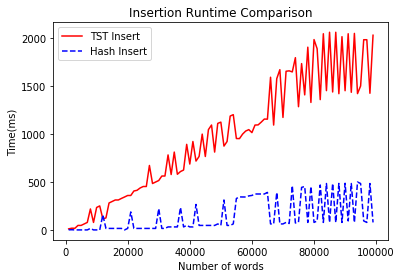

In [17]:
    runtime_insert()

# Testing for the lookup function
The time complexity of the TST and hashing implementations are compared here

In [15]:
def runtime_search():
    nValues = []
    tst_tValues = []
    hash_tValues = []
    
    for i in range(1000, 100000, 1000):
        nValues.append(i)
        words = words_to_array("dict.txt", i)  
        tst = words_to_tst(words) 
        hash = words_to_hash(words, i)
        
        tst_start = time.time()
        for n in words:
            exist = tst.find(n)
        tst_end = time.time()
        
        tst_runtime = (tst_end - tst_start) * 1000
        tst_tValues.append(tst_runtime)
        
        hash_start = time.time()
        for w in words:
            exist = hash.search(w)
        hash_end = time.time()
        
        hash_runtime = (hash_end - hash_start) * 1000
        hash_tValues.append(hash_runtime)

    plt.title("Insertion Runtime Comparison")
    plt.xlabel("Number of words") 
    plt.ylabel("Time(ms)") 
    plt.plot(nValues, tst_tValues, color = "red" , label = "TST Search")
    plt.plot(nValues, hash_tValues, "--", color = "blue", label = "Hash Search")
    plt.grid() 
    plt.legend() 
    plt.show()

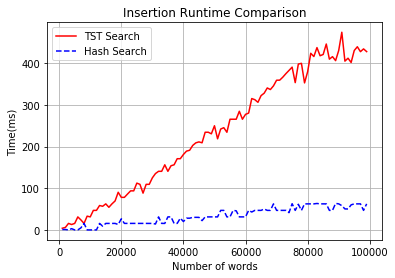

In [16]:
runtime_search()